In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme(style="darkgrid")

folder = "."
seed_choices = {"step_block_3": [150, 200, 250], "step_block_4": [150, 200, 250]}
total_eps_choices = {"step_block_3": 10000, "step_block_4": 10000}
timesteps_choices = {"step_block_3": 150, "step_block_4": 200}
store = {"step_block_3": {'t': [], 'r': [], 'l': []}, "step_block_4": {'t': [], 'r': [], 'l': []}}
for top_goal in ["step_block_3", "step_block_4"]:
    for seed in seed_choices[top_goal]:
        new_level = False
        file = folder+"/"+"ours_10k_{}_uber_level_0_seed_{}.log".format(top_goal, seed)
        with open(file, "r") as f:
            for i, line in enumerate(f.readlines()):
                if "Learning at level" in line:
                    level = line.split()[-1]
                    if float(level) == 2:
                        break
                    new_level = True
                elif new_level and 'Average reward' in line: # after splitting level, e.g. ['At', 'episode', '-', '20', 'Average', 'reward', '-', '0.2166']
                    ep = float(line.split()[3])
                    t = ep * timesteps_choices[top_goal]
                    store[top_goal]['t'].append(t)

                    avg_reward = float(line.split()[-1])
                    store[top_goal]['r'].append(avg_reward)

                    store[top_goal]['l'].append('option-templates, level {}'.format(level))
                    if ep >= total_eps_choices[top_goal]:
                        new_level=False

folder = "."
seed_choices = {"step_block_3": [25, 50], "step_block_4": [25, 50]}
total_eps_choices = {"step_block_3": 10000, "step_block_4": 10000}
n_blocks_choices = {"step_block_3": 3, "step_block_4": 4}
for top_goal in ["step_block_3", "step_block_4"]:
    for seed in seed_choices[top_goal]:
        new_level = False
        file = folder+"/"+"baseline_{}_uber_level_0_seed_{}.log".format(top_goal, seed)
        with open(file, "r") as f:
            for i, line in enumerate(f.readlines()):
                if 'Average reward' in line: # after splitting level, e.g. ['At', 'episode', '-', '20', 'Average', 'reward', '-', '0.2166']
                    ep = float(line.split()[3])
                    t = ep * timesteps_choices[top_goal]
                    store[top_goal]['t'].append(t)

                    avg_reward = float(line.split()[-1])
                    if "step_block_4" in top_goal and seed==50:
                        # unshaping
                        avg_reward = (avg_reward - 1) * n_blocks_choices[top_goal] 
                        avg_reward = min(avg_reward, 0) + 1
                    
                    # shaping
                    avg_reward_shaped = round( (avg_reward+n_blocks_choices[top_goal])/n_blocks_choices[top_goal], 3 )
                    store[top_goal]['r'].append(avg_reward_shaped)

                    store[top_goal]['l'].append('baseline')
                    if ep >= total_eps_choices[top_goal]:
                        break

In [2]:
from matplotlib import pyplot as plt 
plt.rc('font', size=24)          # controls default text sizes
plt.rc('axes', titlesize=24)     # fontsize of the axes title
plt.rc('axes', labelsize=24)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=24)    # fontsize of the tick labels
plt.rc('ytick', labelsize=24)    # fontsize of the tick labels
plt.rc('legend', fontsize=18)    # legend fontsize
plt.rc('figure', titlesize=30)  # fontsize of the figure title
#plt.rc('text', usetex=True)


title_choices = {"step_block_3": "Three blocks", "step_block_4": "Four blocks"}
def plot(top_goal):
    plt.figure(figsize=(8,6))
    plt.title(title_choices[top_goal])
    dicti = {'time steps': store[top_goal]['t'], 'avg reward': store[top_goal]['r'], '': store[top_goal]['l']}
    df = pd.DataFrame.from_dict(dicti)
    sns.lineplot(x='time steps', y='avg reward', hue='',
        data=df)
    plt.legend(loc='lower right')
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

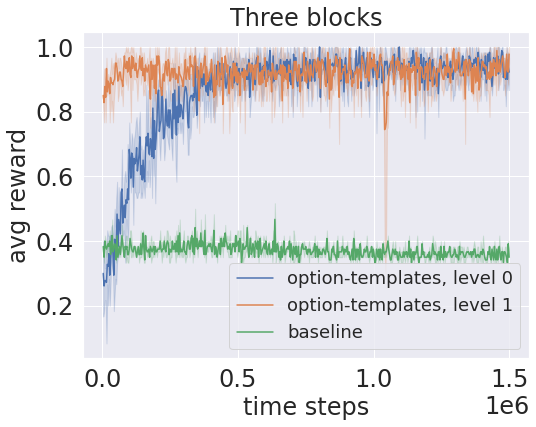

In [3]:
plot("step_block_3")

(-0.09, 1.0)

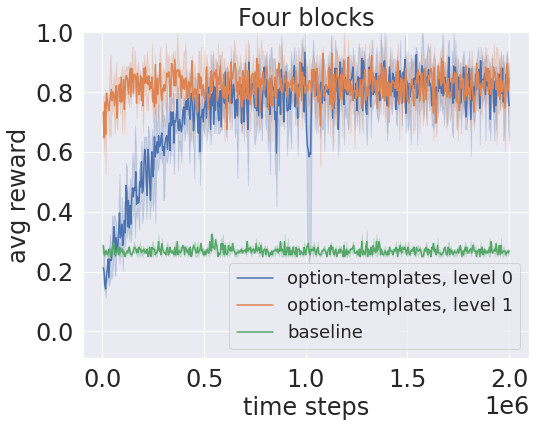

In [4]:
plot("step_block_4")
plt.ylim([-0.09,1])